In [2]:
import pandas as pd
pd.set_option("display.max_columns",None)  ## To fetch all the attributes
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import plotly.express as px  ##For dynamic visualisation

#Natural Language processing 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

In [3]:
df1=pd.read_csv("finalaftercontraction.csv")

In [4]:
df1.shape

(400313, 7)

In [5]:
df1

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments
0,0,1419,38924112,2015-07-19,11308465,Marcela,Having the opportunity of arriving to Alexandr...
1,1,1419,44791978,2015-08-29,9580285,Marco,We have no enough words to describe how beauty...
2,2,1419,45957133,2015-09-07,38394721,Andrea,The listing was exceptional and an even better...
3,3,1419,67295154,2016-03-28,3515044,Shaun,Alexandra's home was amazing and in such a nea...
4,4,1419,177702208,2017-08-03,13987100,Kate,Beautiful home. Very comfortable and clean. Pe...
...,...,...,...,...,...,...,...
400308,400881,571781370061575504,576805871456393571,2022-03-06,445228769,Olivia,Very beautiful property. Clean and very spacious.
400309,400882,571843051378047046,575369353865482208,2022-03-04,189379488,Hassan,Amazing host and great place
400310,400883,572314967237702332,574583975401671156,2022-03-03,435568865,Michael,"great value , easy in and out, very clean ."
400311,400884,572391455274417878,576776957966397983,2022-03-06,430443426,Mehdi,I stayed there for just one night because of a...


In [6]:
print('...Before Removing HyperLink..')

df1.comments[16106]

...Before Removing HyperLink..


'https://www.airbnb.com/reviews/ (Phone number hidden by Airbnb) /edit#  This 2 night stay was perfect  for me.  Gg and Archer accepted my request with very little notice and were there to assist me when I arrived.  They were both warm, friendly, and helpful, yet left me the space I needed.  Great neighborhood, great people!  Would easily stay again!  Thank you!'

In [7]:
## removal of hyperlinks
df1['comments_cleaned']=df1['comments'].replace(to_replace=r'http[^\s]+',value='',regex=True)

print('...After Removing HyperLink..')
df1['comments_cleaned'][16106]

...After Removing HyperLink..


' (Phone number hidden by Airbnb) /edit#  This 2 night stay was perfect  for me.  Gg and Archer accepted my request with very little notice and were there to assist me when I arrived.  They were both warm, friendly, and helpful, yet left me the space I needed.  Great neighborhood, great people!  Would easily stay again!  Thank you!'

In [8]:
print('...Before Removing Breaks..')

df1.comments_cleaned[1260]

...Before Removing Breaks..


"Sandra est une hôte très sympathique, qui répond à toutes les questions qu'un voyageur peut se poser: Elle laisse à ses visiteurs un classeur avec toutes les informations importantes ainsi que toutes les bonnes adresses qu'elle connait.\r<br/>Le logement correspond parfaitement à ce qui est décrit dans l'annonce: très propre, plein de dépliants sur Toronto et les alentours, décoration faite avec goût, etc.\r<br/>Le quartier est proche de tout, extrêmement calme et agréable."

In [9]:
## removal of breakline
df1['comments_cleaned']=df1['comments_cleaned'].replace(to_replace='\<br\/\>|\\r\<br\/\>',value='',regex=True)

print('...After Removing breakline..')
df1['comments_cleaned'][1260]

...After Removing breakline..


"Sandra est une hôte très sympathique, qui répond à toutes les questions qu'un voyageur peut se poser: Elle laisse à ses visiteurs un classeur avec toutes les informations importantes ainsi que toutes les bonnes adresses qu'elle connait.Le logement correspond parfaitement à ce qui est décrit dans l'annonce: très propre, plein de dépliants sur Toronto et les alentours, décoration faite avec goût, etc.Le quartier est proche de tout, extrêmement calme et agréable."

In [10]:
## checking the new lines
df1['comments_cleaned'].str.contains(r'\n').sum()
## As seen there are no new lines

0

In [11]:
## before hashtag removal
print('...Before Removing Hashtag..')

df1['comments_cleaned'][1070]

...Before Removing Hashtag..


'The room we stayed in was great!! Suite #5 in the loft was a nice private suite with a brand new bathroom and mini fridge. The room was very clean and spacious and the bed was comfy. The host was great, friendly and explained everything when we arrived. The only reason that I am not giving it a perfect rating is due to the portable air conditioning unit in the room which was noisy and the temperature was hard to regulate. Minor details in an otherwise great place to stay near downtown between King and Queen St. Thanks for everything Kintoo!! '

In [12]:
## removal of hashtags
df1['comments_cleaned']=df1['comments_cleaned'].replace(to_replace=r'\#[^\s]+|\#',value='',regex=True)

print('...After Removing Hashtag..')
df1['comments_cleaned'][1070]

...After Removing Hashtag..


'The room we stayed in was great!! Suite  in the loft was a nice private suite with a brand new bathroom and mini fridge. The room was very clean and spacious and the bed was comfy. The host was great, friendly and explained everything when we arrived. The only reason that I am not giving it a perfect rating is due to the portable air conditioning unit in the room which was noisy and the temperature was hard to regulate. Minor details in an otherwise great place to stay near downtown between King and Queen St. Thanks for everything Kintoo!! '

In [13]:
print('...Before Removing @Mentions..')

df1['comments_cleaned'][20]

...Before Removing @Mentions..


"Had a wonderful time @ Katie&Larry's! They made me feel very welcome. Easy going people with great hearts and minds. Lovely people! I can only recommend you to stay at their place!"

In [14]:
## removal of @mention
df1['comments_cleaned']=df1['comments_cleaned'].replace(to_replace=r'\@ [^\s]+|\@[^\s]+|\@',value='',regex=True)

print('...After Removing @Mentions..')

df1['comments_cleaned'][20]

...After Removing @Mentions..


'Had a wonderful time  They made me feel very welcome. Easy going people with great hearts and minds. Lovely people! I can only recommend you to stay at their place!'

In [15]:
df1['comments_cleaned'][3608]

'👍🏽👍🏽👍🏽👍🏽'

In [16]:
df1['comments_cleaned'][3633]

'💯'

In [17]:
df1['comments_cleaned'][3636]

'👍'

In [18]:
df1['comments_cleaned'][5449]

'10'

In [19]:
df1['comments_cleaned'][14396]

'👌'

In [20]:
#Example to check if emojis are playing some role in sentiment score or not.
# print(analyzer.polarity_scores("Had a wonderful time  They made me feel very welcome Easy going people with great hearts and minds Lovely people I can only recommend you to stay at their place  "))
# print(analyzer.polarity_scores("👍🏽👍🏽👍🏽👍🏽"))
# print(analyzer.polarity_scores("💯"))
# print(analyzer.polarity_scores("👌"))
# print(analyzer.polarity_scores("Had a wonderful time  They made me feel very welcome. Easy going people with great hearts and minds. Lovely people! I can only recommend you to stay at their place!"))


In [21]:
#!pip install emoji

In [22]:
import emoji
import regex

def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    return len(emoji_list)
            


In [23]:
import emoji
import regex

def emoji_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    return (emoji_list)
            


In [24]:
emoji.UNICODE_EMOJI['en']

{'🥇': ':1st_place_medal:',
 '🥈': ':2nd_place_medal:',
 '🥉': ':3rd_place_medal:',
 '🆎': ':AB_button_(blood_type):',
 '🏧': ':ATM_sign:',
 '🅰️': ':A_button_(blood_type):',
 '🅰': ':A_button_(blood_type):',
 '🇦🇫': ':Afghanistan:',
 '🇦🇱': ':Albania:',
 '🇩🇿': ':Algeria:',
 '🇦🇸': ':American_Samoa:',
 '🇦🇩': ':Andorra:',
 '🇦🇴': ':Angola:',
 '🇦🇮': ':Anguilla:',
 '🇦🇶': ':Antarctica:',
 '🇦🇬': ':Antigua_&_Barbuda:',
 '♒': ':Aquarius:',
 '🇦🇷': ':Argentina:',
 '♈': ':Aries:',
 '🇦🇲': ':Armenia:',
 '🇦🇼': ':Aruba:',
 '🇦🇨': ':Ascension_Island:',
 '🇦🇺': ':Australia:',
 '🇦🇹': ':Austria:',
 '🇦🇿': ':Azerbaijan:',
 '🔙': ':BACK_arrow:',
 '🅱️': ':B_button_(blood_type):',
 '🅱': ':B_button_(blood_type):',
 '🇧🇸': ':Bahamas:',
 '🇧🇭': ':Bahrain:',
 '🇧🇩': ':Bangladesh:',
 '🇧🇧': ':Barbados:',
 '🇧🇾': ':Belarus:',
 '🇧🇪': ':Belgium:',
 '🇧🇿': ':Belize:',
 '🇧🇯': ':Benin:',
 '🇧🇲': ':Bermuda:',
 '🇧🇹': ':Bhutan:',
 '🇧🇴': ':Bolivia:',
 '🇧🇦': ':Bosnia_&_Herzegovina:',
 '🇧🇼': ':Botswana:',
 '🇧🇻': ':Bouvet_Island:',
 '🇧🇷': ':Brazi

In [25]:
#Example with emojis
text = 'Python is good for data analytics 👍👍👍👍👍👍👍👍'
print(split_count(text))

print(emoji_count(text))


8
['👍', '👍', '👍', '👍', '👍', '👍', '👍', '👍']


In [26]:
#Example without emojis
text1 = 'Python is good for data analytics'

print(split_count(text1))

print(emoji_count(text1))

0
[]


In [27]:
df1['len']= df1['comments_cleaned'].apply(lambda x: split_count(x))


In [28]:
df1['emoji']= df1['comments_cleaned'].apply(lambda x: emoji_count(x))


In [29]:
df1['len'].unique()

array([ 0,  1,  5,  3,  2,  4,  6, 11,  8,  7, 10, 12, 14, 40, 18,  9, 43,
       51, 15, 13, 28, 16, 20], dtype=int64)

In [30]:
df1[df1['len'] == 51]

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_cleaned,len,emoji
307380,307775,33043541,662380537,2020-09-09,291419159,Roberta,My stay at the studio was absolutely amazing! ...,My stay at the studio was absolutely amazing! ...,51,"[🥰, 🥰, 🥰, 🥰, ❤️, 🥰, 🤩, 👌🏻, ⭐️, ⭐️, ⭐️, ⭐️, ⭐️,..."


In [31]:
df1['comments_cleaned'][307380]

'My stay at the studio was absolutely amazing! It was truly like a breath of fresh air for me and I enjoyed my all 3 of my stays there! Each one better than the last! 🥰🥰🥰 Not only was the place immaculate & sparkly clean just like the pictures… it was so beautiful & serene. 🥰 I felt safe and secure there which was a huge bonus!! It was like an amazing little retreat... It was like a home away from home!  ❤️ The people in the building were wonderful and so friendly...I felt so at ease during my entire stay there! I definitely will stay there again in the future!  Thank you so much for the amazing hospitality Ann!! 🥰Your thoughtfulness was much appreciated...such an amazing welcoming gesture upon my arrival! Thank you so much for being an excellent host! For everything... especially for being in communication with me the entire time I was there!  I always knew that I could count on you to respond promptly if I had any questions or concerns. Thank you so much also for the wonderful recomm

In [32]:
df2=df1[~(df1['len']<=0)]

In [33]:
df2

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_cleaned,len,emoji
789,790,45399,467646135,2019-06-10,176390795,Dr.Vikas,Sam is perfect host. Very cooperative.Apartmen...,Sam is perfect host. Very cooperative.Apartmen...,1,[🙏]
795,796,45399,507391302,2019-08-11,88165729,Angelina,"This is a great place to stay! Clean, great lo...","This is a great place to stay! Clean, great lo...",5,"[⭐️, ⭐️, ⭐️, ⭐️, ⭐️]"
1490,1492,89575,515838234,2019-08-23,283930208,Joseph,If u are thinking about enjoy ur trip in all t...,If u are thinking about enjoy ur trip in all t...,1,[😁]
2164,2166,196584,521727841112755227,2021-12-20,10423738,Alaa,Everything more than expected ♥️ karens place ...,Everything more than expected ♥️ karens place ...,3,"[♥️, ♥️, 🌹]"
2720,2722,361557,281226012,2018-06-24,169134381,Denisa,The great holiday in Toronto👌☺️,The great holiday in Toronto👌☺️,2,"[👌, ☺️]"
...,...,...,...,...,...,...,...,...,...,...
400246,400819,559350633711629904,570233398386637858,2022-02-25,244565732,Jacob,Good service 🙂👍,Good service 🙂👍,2,"[🙂, 👍]"
400263,400836,562377755483462401,570319296704009541,2022-02-25,380021508,Tennyson,Dave was a fantastic and responsive host! The ...,Dave was a fantastic and responsive host! The ...,1,[💯]
400264,400837,562382487521481006,574614509629890022,2022-03-03,127026940,Jessy,The house is cozy and comfortable. It has easy...,The house is cozy and comfortable. It has easy...,2,"[👌, 👌]"
400287,400860,569505307009231308,576086694225832963,2022-03-05,168053280,Chantel,My fiancé and I stayed here for a night away a...,My fiancé and I stayed here for a night away a...,1,[❤️]


In [34]:
df2

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_cleaned,len,emoji
789,790,45399,467646135,2019-06-10,176390795,Dr.Vikas,Sam is perfect host. Very cooperative.Apartmen...,Sam is perfect host. Very cooperative.Apartmen...,1,[🙏]
795,796,45399,507391302,2019-08-11,88165729,Angelina,"This is a great place to stay! Clean, great lo...","This is a great place to stay! Clean, great lo...",5,"[⭐️, ⭐️, ⭐️, ⭐️, ⭐️]"
1490,1492,89575,515838234,2019-08-23,283930208,Joseph,If u are thinking about enjoy ur trip in all t...,If u are thinking about enjoy ur trip in all t...,1,[😁]
2164,2166,196584,521727841112755227,2021-12-20,10423738,Alaa,Everything more than expected ♥️ karens place ...,Everything more than expected ♥️ karens place ...,3,"[♥️, ♥️, 🌹]"
2720,2722,361557,281226012,2018-06-24,169134381,Denisa,The great holiday in Toronto👌☺️,The great holiday in Toronto👌☺️,2,"[👌, ☺️]"
...,...,...,...,...,...,...,...,...,...,...
400246,400819,559350633711629904,570233398386637858,2022-02-25,244565732,Jacob,Good service 🙂👍,Good service 🙂👍,2,"[🙂, 👍]"
400263,400836,562377755483462401,570319296704009541,2022-02-25,380021508,Tennyson,Dave was a fantastic and responsive host! The ...,Dave was a fantastic and responsive host! The ...,1,[💯]
400264,400837,562382487521481006,574614509629890022,2022-03-03,127026940,Jessy,The house is cozy and comfortable. It has easy...,The house is cozy and comfortable. It has easy...,2,"[👌, 👌]"
400287,400860,569505307009231308,576086694225832963,2022-03-05,168053280,Chantel,My fiancé and I stayed here for a night away a...,My fiancé and I stayed here for a night away a...,1,[❤️]


In [35]:
df3=df2.copy()
df3=df3.reset_index()
df3

,index,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_cleaned,len,emoji
0,789,790,45399,467646135,2019-06-10,176390795,Dr.Vikas,Sam is perfect host. Very cooperative.Apartmen...,Sam is perfect host. Very cooperative.Apartmen...,1,[🙏]
1,795,796,45399,507391302,2019-08-11,88165729,Angelina,"This is a great place to stay! Clean, great lo...","This is a great place to stay! Clean, great lo...",5,"[⭐️, ⭐️, ⭐️, ⭐️, ⭐️]"
2,1490,1492,89575,515838234,2019-08-23,283930208,Joseph,If u are thinking about enjoy ur trip in all t...,If u are thinking about enjoy ur trip in all t...,1,[😁]
3,2164,2166,196584,521727841112755227,2021-12-20,10423738,Alaa,Everything more than expected ♥️ karens place ...,Everything more than expected ♥️ karens place ...,3,"[♥️, ♥️, 🌹]"
4,2720,2722,361557,281226012,2018-06-24,169134381,Denisa,The great holiday in Toronto👌☺️,The great holiday in Toronto👌☺️,2,"[👌, ☺️]"
...,...,...,...,...,...,...,...,...,...,...,...
5498,400246,400819,559350633711629904,570233398386637858,2022-02-25,244565732,Jacob,Good service 🙂👍,Good service 🙂👍,2,"[🙂, 👍]"
5499,400263,400836,562377755483462401,570319296704009541,2022-02-25,380021508,Tennyson,Dave was a fantastic and responsive host! The ...,Dave was a fantastic and responsive host! The ...,1,[💯]
5500,400264,400837,562382487521481006,574614509629890022,2022-03-03,127026940,Jessy,The house is cozy and comfortable. It has easy...,The house is cozy and comfortable. It has easy...,2,"[👌, 👌]"
5501,400287,400860,569505307009231308,576086694225832963,2022-03-05,168053280,Chantel,My fiancé and I stayed here for a night away a...,My fiancé and I stayed here for a night away a...,1,[❤️]


In [36]:
df3['comments_cleaned'][0]

'Sam is perfect host. Very cooperative.Apartment is located in heart of downtown.Provided all amenities as mentioned in airbnb . Thanks Sam for everything you did for us during our long stay.will stay again and again.🙏'

In [37]:
# from langdetect import detect
# langdect=[]

# for i in range(0,len(df3['comments_cleaned'])):
#     try:
#         lang=detect(df3['comments_cleaned'][i])
#     except:
        
#         print("this row contains error",i,df3['comments_cleaned'][i])
#         langdect.append(lang)
        


In [38]:
# langdect

In [39]:
# import string
# from wordcloud import WordCloud
# from collections import Counter
# import matplotlib.pyplot as plt

# class EmojiCloud:
#     def __init__(self,                     ## with self we can access the attributes and methods of the class in python.
#                  font_path='Symbola.ttf',
#                  color='orange'):
#         self.font_path = font_path
#         self.color = color
#         self.word_cloud = self.initialize_wordcloud()
#         self.emoji_probability = None

#     def initialize_wordcloud(self):
#         word_cloud = WordCloud(font_path=self.font_path,
#                                width=5000,
#                                height=3000,
#                                background_color='black',
#                                random_state=42,
#                                collocations=False)
#         return word_cloud

#     def color_func(self, word, font_size, position, orientation, random_state=None,
#                    **kwargs):
#         hue_saturation = {              ## hue_saturation adjusts the color, saturation, lightness of the image
#             'yellow': '42, 88%',
#             'blue': '194, 49%',
#             'green': '159, 42%',
#             'grey': '45, 2%'
#         }.get(self.color)

#         current_emoji_probability = self.emoji_probability[word]
#         # Use 50% opacity for emojis with 20% or more coverage
#         if current_emoji_probability >= 0.20:
#             opacity = 50
#         else:
#             # Use an opacity between 70 to 75 for other emojis
#             opacity = 75 - current_emoji_probability/0.2 * 5
#         return f"hsl({hue_saturation},{opacity}%)"

#     def generate(self, emojis):
#         emoji_frequencies = Counter(emojis)
#         total_count = len(emojis)
        
#         # Calculate probabilities of emojis from frequency counts
#         self.emoji_probability = {emoji: count/total_count for emoji, count in emoji_frequencies.items()}
        
#         # Use wordcloud library to generate a wordcloud of emojis
#         wc = self.word_cloud.generate_from_frequencies(emoji_frequencies)
        
#         # Recolor emojis ac cording to their frequency
#         plt.imshow(wc.recolor(color_func=self.color_func, random_state=42),
#                    interpolation="bilinear")
#         plt.axis("off")

In [40]:
import string
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

class EmojiCloud:
    def __init__(self,                     ## with self we can access the attributes and methods of the class in python.
                 font_path='Symbola.ttf',
                ):
        self.font_path = font_path
        self.word_cloud = self.initialize_wordcloud()
        
    def initialize_wordcloud(self):
        word_cloud = WordCloud(font_path=self.font_path,
                               width=5000,
                               height=3000,
                               background_color='black',
                               random_state=42,
                               )
        return word_cloud
    def generate(self, emojis):
        emoji_frequencies = Counter(emojis)
                             
        # Use wordcloud library to generate a wordcloud of emojis
        wc = self.word_cloud.generate_from_frequencies(emoji_frequencies)
        
        # Recolor emojis ac cording to their frequency
        plt.imshow(wc.recolor())
        plt.axis("off")


In [41]:
#Example
text = '👍👍👍👍💯💯💯👌👌'


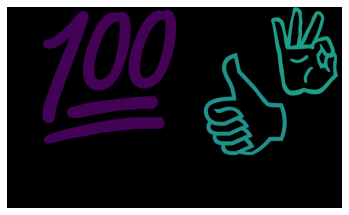

In [42]:
#Example
emoji_cloud = EmojiCloud(font_path='./Symbola.ttf')
emoji_cloud.generate(text)

In [43]:
emoji_df=df2.copy()
emoji_df=emoji_df.reset_index()
emoji_df

,index,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_cleaned,len,emoji
0,789,790,45399,467646135,2019-06-10,176390795,Dr.Vikas,Sam is perfect host. Very cooperative.Apartmen...,Sam is perfect host. Very cooperative.Apartmen...,1,[🙏]
1,795,796,45399,507391302,2019-08-11,88165729,Angelina,"This is a great place to stay! Clean, great lo...","This is a great place to stay! Clean, great lo...",5,"[⭐️, ⭐️, ⭐️, ⭐️, ⭐️]"
2,1490,1492,89575,515838234,2019-08-23,283930208,Joseph,If u are thinking about enjoy ur trip in all t...,If u are thinking about enjoy ur trip in all t...,1,[😁]
3,2164,2166,196584,521727841112755227,2021-12-20,10423738,Alaa,Everything more than expected ♥️ karens place ...,Everything more than expected ♥️ karens place ...,3,"[♥️, ♥️, 🌹]"
4,2720,2722,361557,281226012,2018-06-24,169134381,Denisa,The great holiday in Toronto👌☺️,The great holiday in Toronto👌☺️,2,"[👌, ☺️]"
...,...,...,...,...,...,...,...,...,...,...,...
5498,400246,400819,559350633711629904,570233398386637858,2022-02-25,244565732,Jacob,Good service 🙂👍,Good service 🙂👍,2,"[🙂, 👍]"
5499,400263,400836,562377755483462401,570319296704009541,2022-02-25,380021508,Tennyson,Dave was a fantastic and responsive host! The ...,Dave was a fantastic and responsive host! The ...,1,[💯]
5500,400264,400837,562382487521481006,574614509629890022,2022-03-03,127026940,Jessy,The house is cozy and comfortable. It has easy...,The house is cozy and comfortable. It has easy...,2,"[👌, 👌]"
5501,400287,400860,569505307009231308,576086694225832963,2022-03-05,168053280,Chantel,My fiancé and I stayed here for a night away a...,My fiancé and I stayed here for a night away a...,1,[❤️]


In [44]:
comment_emoji=emoji_df['emoji']

In [45]:
for i in range(len(comment_emoji)):
    comment_emoji[i]= " ".join(comment_emoji[i])

In [46]:
comment_emoji

0                    🙏
1       ⭐️ ⭐️ ⭐️ ⭐️ ⭐️
2                    😁
3              ♥️ ♥️ 🌹
4                 👌 ☺️
             ...      
5498               🙂 👍
5499                 💯
5500               👌 👌
5501                ❤️
5502             ❤️ ❤️
Name: emoji, Length: 5503, dtype: object

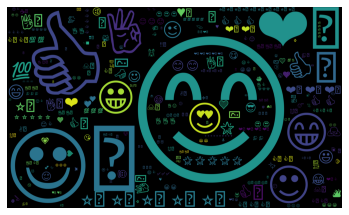

In [47]:
emoji_cloud = EmojiCloud(font_path='./Symbola.ttf')
emoji_cloud.generate(comment_emoji)

## Extracting English Comments

In [48]:
sh=df1.copy()

In [49]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [50]:
sh['comments_cleaned']=sh['comments_cleaned'].apply(lambda x: remove_emoji(x))


In [51]:
df1['comments_cleaned'][3608]

'👍🏽👍🏽👍🏽👍🏽'

In [52]:
sh['comments_cleaned'][3608]

''

In [53]:
sh['comments_cleaned']=sh['comments_cleaned'].replace(to_replace=r'\d+',value='',regex=True)  #remove digits


In [54]:
sh['comments_cleaned']=sh['comments_cleaned'].replace(to_replace=r'[^\w\s]',value='',regex=True) #remove punctuations


In [55]:
sh['comments_cleaned']=sh['comments_cleaned'].replace(to_replace=r'[^a-zA-Z\s]+',value='',regex=True) #remove punctuations


In [56]:
print("Before removing punctuations...")
sh['comments'][161]

Before removing punctuations...


"Great location downtown.  Room ok : great bed but bathroom a little bit weary..  Room very noisy because of buidling up a new condo in front of the room (CN Tower will be out of the view by that time).\r<br/> Cold welcome and no contact whatsoever with owners. The sole time I talked with kathie, I just had the feeling she didn't give a damn.\r<br/>Not a good first experience with Air BNB  "

In [57]:
print("After removing punctuations...")

sh['comments_cleaned'][161]

After removing punctuations...


'Great location downtown  Room ok  great bed but bathroom a little bit weary  Room very noisy because of buidling up a new condo in front of the room CN Tower will be out of the view by that time Cold welcome and no contact whatsoever with owners The sole time I talked with kathie I just had the feeling she didnt give a damnNot a good first experience with Air BNB  '

In [58]:
sh['comments_cleaned']=sh['comments_cleaned'].replace(to_replace='  +',value='',regex=True)


In [59]:
sh['comments_cleaned'][161]

'Great location downtownRoom okgreat bed but bathroom a little bit wearyRoom very noisy because of buidling up a new condo in front of the room CN Tower will be out of the view by that time Cold welcome and no contact whatsoever with owners The sole time I talked with kathie I just had the feeling she didnt give a damnNot a good first experience with Air BNB'

In [60]:
sh['comments_cleaned']=sh['comments_cleaned'].replace(to_replace=r'[.]+',value='',regex=True)  ##to remove combination of dots


In [61]:
sh['comments_cleaned']=sh['comments_cleaned'].replace(to_replace='  ',value='',regex=True)


In [62]:
sh['comments_cleaned'][794]

''

In [63]:
len(sh['comments_cleaned'][794])

0

In [64]:
sh['name_length'] = sh.comments_cleaned.str.len()

In [65]:
sh['name_length']

0         463
1         236
2         525
3         360
4         280
         ... 
400308     47
400309     28
400310     38
400311    548
400312     25
Name: name_length, Length: 400313, dtype: int64

In [66]:
sh=sh[~(sh['name_length']<=1)]

In [67]:
df1.shape

(400313, 10)

In [68]:
sh.shape

(396809, 11)

In [69]:
#!pip install langdetect

In [70]:
def check(text):
    from langdetect import detect

    a= detect(text)
    return a

In [ ]:
sh['language']=sh['comments_cleaned'][0:].apply(lambda x: check(x))

In [ ]:
count=sh['language'].value_counts()
count=pd.DataFrame(count)
count['name']=count.index
count


In [ ]:
plt.bar(count.name,count.language, data=count)

plt.show()

In [ ]:
sh=sh[sh['language']=='en']
sh.shape

In [ ]:
df3 = df2[['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments','comments_cleaned']]
df3.shape

In [ ]:
sh1 = sh[['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments','comments_cleaned']]
sh1

In [ ]:
frames = [df3,sh1]

final = pd.concat(frames,ignore_index=True)


In [ ]:
final.shape

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer=SentimentIntensityAnalyzer()

In [ ]:
final['Positive Score'] = final['comments_cleaned'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
final['Neutral Score'] = final['comments_cleaned'].apply(lambda x: analyzer.polarity_scores(x)['neu'])
final['Negative Score'] = final['comments_cleaned'].apply(lambda x: analyzer.polarity_scores(x)['neg'])

In [ ]:
final['Compound Score'] = final['comments_cleaned'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [ ]:
final.head()

In [ ]:
final.duplicated().sum()

In [ ]:
final[final['listing_id']==1727775]

## Positive Wordcloud

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords = nltk.corpus.stopwords.words('english')

stopwords = set(stopwords)
stopwords.update(["br", "href",'get','many','also','like','way','make','would','one','b','made','lot','next','place']) 

data_wc = " ".join(review for review in final[final['Compound Score'] > 0 ]['comments_cleaned'])
wordcloud = WordCloud(stopwords=stopwords,background_color='black',mode="RGB", width=800,height=500,
                      max_words=100,collocations=False).generate(data_wc)


plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Negative Wordcloud

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords = nltk.corpus.stopwords.words('english')

stopwords = set(stopwords)
stopwords.update(["br", "href",'get','many','also','like','way','make','would','one','b','made','lot','next','wasnt','dont'
                  ,'didnt','said','told','asked','take','u','us','couldnt','place','could']) 

data_wc = " ".join(review for review in final[final['Compound Score'] < 0 ]['comments_cleaned'])
wordcloud = WordCloud(stopwords=stopwords,background_color='black',mode="RGB", width=800,height=500,
                      max_words=100,collocations=False).generate(data_wc)


plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Neutral Wordcloud

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords = nltk.corpus.stopwords.words('english')

stopwords = set(stopwords)
stopwords.update(["br", "href",'get','many','also','like','way','make','would','one','b','made','lot','next','wasnt','dont'
                   ,'didnt','said','told','asked','take','u','us','couldnt','cant']) 

data_wc = " ".join(review for review in final[final['Compound Score'] == 0 ]['comments_cleaned'])
wordcloud = WordCloud(stopwords=stopwords,background_color='black',mode="RGB", width=800,height=500,
                      max_words=100,collocations=False).generate(data_wc)


plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
final_avg = final.groupby('listing_id', as_index=False)['Compound Score'].mean()
final_avg

In [ ]:
final_avg.rename(columns = {'listing_id' : 'id'}, inplace = True)

In [ ]:
final_avg

In [ ]:
df_listing = pd.read_csv("new_cleaned.csv")
df_listing.shape

In [ ]:
final_model = pd.merge(df_listing, final_avg, on='id')
final_model

In [ ]:
final_model.isnull().sum()

In [ ]:
#final_model.to_csv('priceprediction.csv')